<a href="https://colab.research.google.com/github/koojaekwan/Kaggle_study/blob/master/pandas_exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas trick with Titanic data
I refer that Kaggle :
https://www.kaggle.com/python10pm/pandas-100-tricks#Welcome-to-this-Kernel

In [ ]:
# basic libraries
import os
import numpy as np
import pandas as pd

## Google drive mount

In [ ]:
# connect to google drive
from google.colab import drive

# drive.mount('./MyDrive/MyDrive')

In [ ]:
# 마운트된 내 드라이브를 확인 # current file in working directory
!ls

 coding_test				 test.csv
'Colab Notebooks'			 train.csv
'머신러닝 도감(제이펍).gdoc'		 trick99data.csv
'srr-mave-gqc - 2020년 10월 11일.gjam'


In [ ]:
os.getcwd()   # current working directory
os.chdir('/content/MyDrive/MyDrive')  # setwd like R
os.getcwd() 

'/content/MyDrive/MyDrive'

## Trick 100: Loading sample of big data

In [ ]:
df = pd.read_csv("train.csv")
print("The shape of the df is {}".format(df.shape))

print(df.columns)
df

The shape of the df is (891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
del df

df = pd.read_csv("train.csv", skiprows = lambda x: x>0 and np.random.rand() > 0.01)
print("The shape of the df is {}. It has been reduced 10 times!".format(df.shape))

df

The shape of the df is (6, 12). It has been reduced 10 times!


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C
1,189,0,3,"Bourke, Mr. John",male,40.0,1,1,364849,15.5000,NaN,Q
2,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S
3,326,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C32,C
4,719,0,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q
5,777,0,3,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.7500,F38,Q


In [ ]:
print(np.random.rand())
print(np.random.rand(10))

0.19797604025789328
[7.47472725e-01 9.09773150e-01 1.81341288e-02 7.31867037e-01
 3.77279665e-04 3.04762171e-01 8.84715728e-01 9.04687054e-01
 1.68388468e-01 7.71515314e-01]


* 만들어진 난수 어레이는 주어진 값에 의해 결정되며, [0, 1) 범위에서 균일한 분포를 갖는다.
* 괄호 안에 숫자를 넣지않으면 1개의 random value가 나오게 된다.


How it works:
skiprows accepts a function that is evaluated against the integer index.
x > 0 makes sure that the headers is not skipped
np.random.rand() > 0.01 returns True 99% of the tie, thus skipping 99% of the time.
Note that we are using skiprows

## Trick 99 : How to avoid Unnamed : 0 columns

In [ ]:
d = {\
     'zip_code' : [12345,56789,101112,131415],
     'factory' : [100, 400, 500, 600],
     'warehouse' : [200, 300, 400, 500],
     'retail' : [1, 2, 3, 4]}

df = pd.DataFrame(d)
df

,zip_code,factory,warehouse,retail
0,12345,100,200,1
1,56789,400,300,2
2,101112,500,400,3
3,131415,600,500,4


In [ ]:
# save to csv
df.to_csv('trick99data.csv')

df = pd.read_csv('trick99data.csv')
df

,Unnamed: 0,zip_code,factory,warehouse,retail
0,0,12345,100,200,1
1,1,56789,400,300,2
2,2,101112,500,400,3
3,3,131415,600,500,4


In [ ]:
# To avoid Unnamed : 0
df = pd.read_csv('trick99data.csv', index_col = 0)
# or when saving df = pd.read_csv('trick99data.csv', index = False)
df

,zip_code,factory,warehouse,retail
0,12345,100,200,1
1,56789,400,300,2
2,101112,500,400,3
3,131415,600,500,4


## Trick 98 : Convert a wide DF into a long one

In [ ]:
d = {\
     'zip_code' : [12345,56789,101112,131415],
     'factory' : [100, 400, 500, 600],
     'warehouse' : [200, 300, 400, 500],
     'retail' : [1, 2, 3, 4]}

df = pd.DataFrame(d)
df

,zip_code,factory,warehouse,retail
0,12345,100,200,1
1,56789,400,300,2
2,101112,500,400,3
3,131415,600,500,4


In [ ]:
# we have to reassing

# location_type is generated automatically from the columns left after specifying id_vars ( you can pass a list also)

df_melt = df.melt(id_vars = 'zip_code', var_name = 'location_type', value_name = 'distance')
df_melt

,zip_code,location_type,distance
0,12345,factory,100
1,56789,factory,400
2,101112,factory,500
3,131415,factory,600
4,12345,warehouse,200
5,56789,warehouse,300
6,101112,warehouse,400
7,131415,warehouse,500
8,12345,retail,1
9,56789,retail,2


## Trick 97 : Convert year and day of year into a single datatime column

In [ ]:
# Convert
d = {\
"year": [2019, 2019, 2020],
"day_of_year": [350, 365, 1]
}

df = pd.DataFrame(d)
df

# Step 1: create a combined column
df["combined"] = df["year"]*1000 + df["day_of_year"]
df

# Step 2: convert to datetime
df["date"] = pd.to_datetime(df["combined"], format = "%Y%j")
df

,year,day_of_year,combined,date
0,2019,350,2019350,2019-12-16
1,2019,365,2019365,2019-12-31
2,2020,1,2020001,2020-01-01


## Trick 96 : Interactive plots out of the box in pandas

In [ ]:
print(pd.__version__)
# Pandas version 0.25 or higher requiered and you need hvplot

1.1.5


In [ ]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


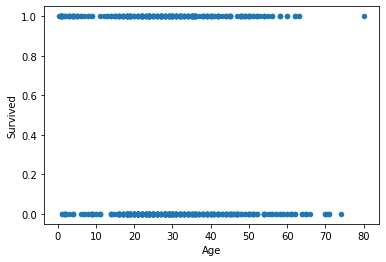

In [ ]:
# this one is not interactve
df.plot(kind = "scatter", x = "Age", y = "Survived")

# run !pip install hvplot
#pd.options.plotting.backend = "hvplot"
#df.plot(kind = "scatter", x = "spirit_servings", y = "wine_servings", c = "continent")

## Trick 95 : Count the missing values

In [ ]:
d = {\
     "col1": [2019, 2019, 2020],
     "col2": [350, 365, 1],
     "col3": [np.nan, 365, None]
}


df = pd.DataFrame(d)
df

,col1,col2,col3
0,2019,350,NaN
1,2019,365,365.0
2,2020,1,NaN


In [ ]:
df.isnull().sum(axis = 0)  # axis = 0 : columns, axis = 1 : rows

col1    0
col2    0
col3    2
dtype: int64

In [ ]:
# Solution 1
df.isnull().sum().sum()  # the total number of NaN

2

In [ ]:
# Solution 2
df.isna().sum()

col1    0
col2    0
col3    2
dtype: int64

In [ ]:
# Solution 3
df.isna().any(axis = 0) # 컬럼 기준으로 어떠한 na도 있는지 체크

col1    False
col2    False
col3     True
dtype: bool

In [ ]:
# Solution 4:
df.isna().any(axis = None) # 전체 기준으로 체크

True

## Trick 94: Save memory by fixing your date

In [ ]:
df = pd.read_csv("train.csv", usecols = ["Pclass", "Sex", "Parch", "Cabin"])

df

,Pclass,Sex,Parch,Cabin
0,3,male,0,NaN
1,1,female,0,C85
2,3,female,0,NaN
3,1,female,0,C123
4,3,male,0,NaN
...,...,...,...,...
886,2,male,0,NaN
887,1,female,0,B42
888,3,female,2,NaN
889,1,male,0,C148


In [ ]:
# let's see how much our df occupies in memory
df.memory_usage(deep = True)

Index       128
Pclass     7128
Sex       54979
Parch      7128
Cabin     34344
dtype: int64

In [ ]:
# convert to smaller datatypes
df = df.astype({"Pclass":"int8",
                "Sex":"category", 
                "Parch": "Sparse[int]", # most values are 0
                "Cabin":"Sparse[str]"}) # most values are NaN

df.memory_usage(deep = True)

Index       128
Pclass      891
Sex        1095
Parch      2556
Cabin     29664
dtype: int64

## Trick 93: Combine the small categories into a single category named "Others" (using frequencies)

In [ ]:
d = {"genre": ["A", "A", "A", "A", "A", "B", "B", "C", "D", "E", "F"]}
df = pd.DataFrame(d)

df

,genre
0,A
1,A
2,A
3,A
4,A
5,B
6,B
7,C
8,D
9,E


In [ ]:
# Step 1: count the frequencies
frequencies = df["genre"].value_counts(normalize = True)
frequencies

A    0.454545
B    0.181818
F    0.090909
C    0.090909
D    0.090909
E    0.090909
Name: genre, dtype: float64

In [ ]:
# Step 2: establish your threshold and filter the smaller categories
threshold = 0.2

small_categories = frequencies[frequencies < threshold].index
small_frequencies = frequencies[frequencies < threshold].values

print(small_categories)
print(small_frequencies)

Index(['B', 'F', 'C', 'D', 'E'], dtype='object')
[0.18181818 0.09090909 0.09090909 0.09090909 0.09090909]


In [ ]:
# Step 3: replace the values
df["genre"] = df["genre"].replace(small_categories, "Other") # B -> Other
df["genre"].value_counts(normalize = True)

Other    0.545455
A        0.454545
Name: genre, dtype: float64

## Trick 92: Clean Object column with mixed data using regex

In [ ]:
d = {"customer": ["A", "B", "C", "D"], "sales":[1100, 950.75, "$400", "$1250.35"]}
df = pd.DataFrame(d)

df

,customer,sales
0,A,1100
1,B,950.75
2,C,$400
3,D,$1250.35


In [ ]:
# Step 1: check the data types
df["sales"].apply(type)

0      <class 'int'>
1    <class 'float'>
2      <class 'str'>
3      <class 'str'>
Name: sales, dtype: object

In [ ]:
# Step 2: use regex
df["sales"] = df["sales"].replace("[$,]", "", regex = True).astype("float")

df

,customer,sales
0,A,1100.00
1,B,950.75
2,C,400.00
3,D,1250.35


In [ ]:
df["sales"].apply(type)

0    <class 'float'>
1    <class 'float'>
2    <class 'float'>
3    <class 'float'>
Name: sales, dtype: object

## Trick 91: Creating a time series dataset for testing

In [ ]:
# Solution 1
number_or_rows = 365*24 # hours in a year # 8760
pd.util.testing.makeTimeDataFrame(number_or_rows, freq="H")

,A,B,C,D
2000-01-01 00:00:00,-1.172230,0.977885,-0.696805,-1.257194
2000-01-01 01:00:00,0.366477,-1.495635,1.306314,-0.392800
2000-01-01 02:00:00,0.662438,0.583865,0.753131,-0.541241
2000-01-01 03:00:00,-0.680499,0.826893,0.187363,1.023859
2000-01-01 04:00:00,0.007257,-1.274306,0.227803,-2.715783
...,...,...,...,...
2000-12-30 19:00:00,0.496386,-1.467493,-0.470515,0.645080
2000-12-30 20:00:00,-0.477786,1.010420,0.873781,-2.188128
2000-12-30 21:00:00,-0.758060,-0.388092,-0.344928,0.480310
2000-12-30 22:00:00,0.981809,0.034853,1.593048,-0.119442


In [ ]:
# Solution 2
num_cols = 2
cols = ["sales", "customers"]

df = pd.DataFrame(np.random.randint(1, 20, size = (number_or_rows, num_cols)), columns=cols)
df.index = pd.util.testing.makeDateIndex(number_or_rows, freq="H") # 시간을 index로 넣음

df

,sales,customers
2000-01-01 00:00:00,11,5
2000-01-01 01:00:00,15,8
2000-01-01 02:00:00,1,13
2000-01-01 03:00:00,13,14
2000-01-01 04:00:00,16,18
...,...,...
2000-12-30 19:00:00,13,3
2000-12-30 20:00:00,2,17
2000-12-30 21:00:00,13,1
2000-12-30 22:00:00,18,7


## Trick 90: Moving columns to a specific location

In [ ]:
d = {"A":[15, 20], "B":[20, 25], "C":[30 ,40], "D":[50, 60]}
df = pd.DataFrame(d)

df

,A,B,C,D
0,15,20,30,50
1,20,25,40,60


In [ ]:
# Using insert
df.insert(3, "C2", df["C"]*2)
df

,A,B,C,C2,D
0,15,20,30,60,50
1,20,25,40,80,60


In [ ]:
# Other solution
df["C3"] = df["C"]*3 # create a new columns, it will be at the end
columns = df.columns.to_list() # create a list with all columns


print(columns)
df

['A', 'B', 'C', 'C2', 'D', 'C3']


,A,B,C,C2,D,C3
0,15,20,30,60,50,90
1,20,25,40,80,60,120


In [ ]:
location = 4 # specify the location where you want your new column
columns = columns[:location] + ["C3"] + columns[location:-1] # reaarange the list # -1 : the last thing

columns

['A', 'B', 'C', 'C2', 'C3', 'D']

In [ ]:
df = df[columns] # create te dataframe in with the order of columns you like
df

,A,B,C,C2,C3,D
0,15,20,30,60,90,50
1,20,25,40,80,120,60
